# *FEniCS tutorial:* Diffusion of a Gaussian hill in a two-dimensional disc

In this demo, we solve the two-dimensional diffusion equation with Dirichlet
bounadary conditions $u_D$ and source term $f = 0$. The initial condition,
$u_0$, we define as a Gaussian hill.

$$
\begin{align}
  u'   &= \nabla^2 u + f \quad\text{in the unit circle} \\
  u    &= u_D  \hphantom{u+f}\quad\text{on the boundary} \\
  u    &= u_0  \hphantom{u+f}\quad\;\text{at $t = 0$} \\
\end{align}
$$
with
$$
\begin{align}
  u_D  &= 0 \\
  u_0  &= \exp\bigl(-a(x^2 + y^2)\bigr) \\
  f    &= 0
\end{align}
$$

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import time as tm

# import os
# import sys
# import re
# from IPython.display import Image
# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "all"

In [2]:
from fenics import *
from mshr import *

In [3]:
## set up the problem and define the main simulation function evolve()

# simulation parameters
# -- time step
T = 0.25          # total simulation time
n_steps = 15      # number of time steps
dt = T / n_steps  # size of time step
nip = 3           # number of intervals between plots
# -- mesh density
md = 24           # mesh density within disc

# create mesh and define function space
domain = Circle(Point(0, 0), 1)
mesh = generate_mesh(domain, md)
V = FunctionSpace(mesh, 'P', 2)

# define boundary condition
def boundary(x, on_boundary):
    return on_boundary

bc = DirichletBC(V, Constant(0), boundary)

# define initial value
u_0 = Expression('exp(-a*pow(x[0] - x0, 2) - a*pow(x[1] - y0, 2))',
                 degree=2, x0=0., y0=0.30, a=5)
u_n = interpolate(u_0, V)

u_min = 0.
u_max = 1.

# define variational problem
u = TrialFunction(V)
v = TestFunction(V)
f = Constant(0)
F = u*v*dx + dt*dot(grad(u), grad(v))*dx - (u_n + dt*f)*v*dx
a, L = lhs(F), rhs(F)

# define time-evolution function
def evolve():

    # report initial state
    yield u_n

    # time-stepping
    u = Function(V)
    t = 0
    for n in range(1, n_steps + 1):

        # update current time
        t += dt

        # compute solution
        solve(a == L, u, bc)

        # report solution at nip-step intervals
        if n % nip == 0:
            yield u

        # update previous solution
        u_n.assign(u)

Calling FFC just-in-time (JIT) compiler, this may take some time.


Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.


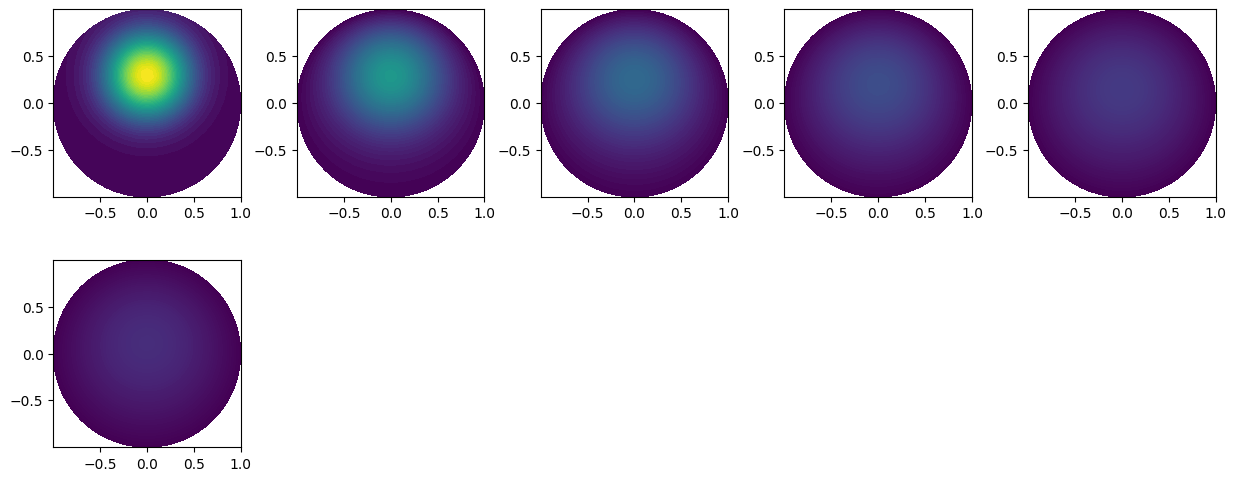

In [4]:
n_rows = 3
n_cols = 5
fig_wd = 15
# default sizing here yields unit aspect ratio
plt.figure(figsize = (fig_wd, fig_wd * n_rows // n_cols))
plt.subplots_adjust(wspace=0.3, hspace=0.3)

idx = 0
for u in evolve():
    idx += 1
    plt.subplot(n_rows, n_cols, idx)
    plot(u, vmin=u_min, vmax=u_max)

In [5]:
mesh

In [6]:
u

Coefficient(FunctionSpace(Mesh(VectorElement(FiniteElement('Lagrange', triangle, 1), dim=2), 3), FiniteElement('Lagrange', triangle, 2)), 21)

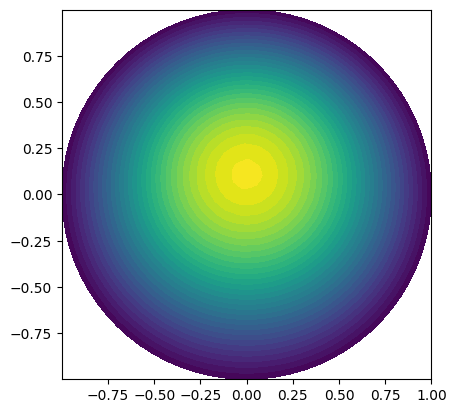

In [7]:
plot(u)